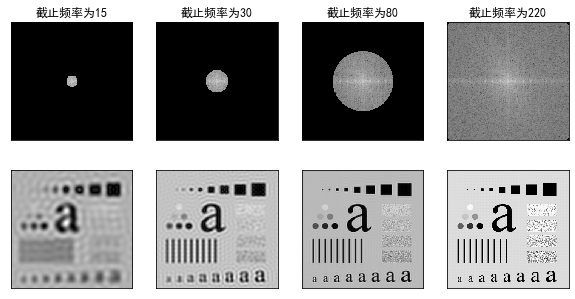

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv.imread(r'..\img\alphabet.jpg', 0)
f = np.fft.fft2(img)
fshift0 = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(1+np.abs(fshift0))
angle_spectrum = np.abs(np.angle(fshift0))

dd=[15,30,80,220]

rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift=np.zeros((4,rows,cols))+0j
img_back=np.zeros((4,rows,cols))
i=0
for d in dd:
    d0=d**2
    fshift[i,:,:]=fshift0
    for u in range(rows):
        for v in range(cols):
            d=(u-crow)**2+(v-ccol)**2
            if d>d0:
                fshift[i,u,v]=0+0j

    f_ishift = np.fft.ifftshift(fshift[i])
    temp = np.fft.ifft2(f_ishift)
    img_back[i,:,:] = np.abs(temp)
    i=i+1
    

plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(20 * np.log(1+np.abs(fshift[i])), cmap = 'gray')
    plt.title('截止频率为'+str(dd[i])), plt.xticks([]), plt.yticks([])
    plt.subplot(2,4,4+i+1),plt.imshow(img_back[i],cmap = 'gray')
    plt.xticks([]), plt.yticks([])
plt.savefig("ch4-15.jpg")
# plt.show()


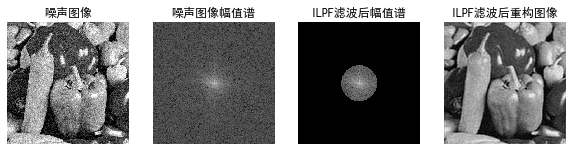

In [2]:
import cv2
import numpy as np
from math import *
import random
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负


def addGaussianNoise(src,means=0,sigma=0.1):
    NoiseImg=src/src.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(means,sigma)
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    return NoiseImg

img0 = cv2.imread(r'..\img\peppers.bmp',0)
img=addGaussianNoise(img0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum0 = 20*np.log(1+np.abs(fshift)) 
plt.figure(figsize=(10,5))
plt.subplot(141),plt.imshow(img, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像'), plt.axis("off")
plt.subplot(142),plt.imshow(magnitude_spectrum0, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像幅值谱')
plt.axis("off")
#进行理想低通滤波
r=50      #截止频率的设置
[m,n]=fshift.shape
H=np.zeros((m,n),dtype =np.complex_)
for i in range(m):
    for j in range(n):
        d=sqrt((i-m/2)*(i-m/2)+(j-n/2)*(j-n/2))
        if d<r:
            H[i,j]= 1
G=H*fshift
magnitude_spectrum1 =20*np.log(1+np.abs(G))  #理想低通滤波后的幅值谱
f1 = np.fft.ifftshift(G)
img1 = abs(np.fft.ifft2(f1))   #重构图像
# plt.subplot(142),plt.imshow(20*np.log(1+np.abs(H)), cmap = 'gray')  #显示滤波后幅值谱
plt.subplot(143),plt.imshow(magnitude_spectrum1, cmap = 'gray')  #显示滤波后幅值谱
plt.title('ILPF滤波后幅值谱'), plt.axis("off")
plt.subplot(144),plt.imshow(img1, cmap = 'gray')  #显示重构图像
plt.title('ILPF滤波后重构图像'), plt.axis("off")
plt.show()
